### 简介
当程序出现例外情况时会发生异常，例如读取文件但文件不存在，在程序执行时不小心把它删除了？在程序中出现了无效语句（可能记差了）？等等……Python会有对应的提示，并且解决对应问题的方法基本都已存在。

在程序运行的过程中，如果发生了错误，可以事先约定返回一个错误代码，可以知道是否有错和出错的原因。在操作系统提供的调用中，返回错误码非常常见，例如打开文件的函数open()，成功时返回文件描述，出错返回-1.

函数返回的正确结果有时和错误码容易混淆，对于分辨造成很大的不便。而出错时往往一级一级上报，直到某个函数可以处理。所以高级语言例如Python通常内置一套try - except - finally/else语句做错误处理机制而用,本文将从try、try - except等深入解说，。

 - Python标准异常总结
 - 异常体系层级图
 - Python标准警告总结
 - try - except语句
 - try - except -finally语句
 - try - except -else语句
 - raise语句（案例详解）
 - 练习题

### Pyrhon标准异常总结
 - BaseException：所有异常的 基类
 - Exception：常规异常的 基类
 - StandardError：所有的内建标准异常的基类
 - ArithmeticError：所有数值计算异常的基类
 - FloatingPointError：浮点计算异常
 - OverflowError：数值运算超出最大限制
 - ZeroDivisionError：除数为零
 - AssertionError：断言语句（assert）失败
 - AttributeError：尝试访问未知的对象属性
 - EOFError：没有内建输入，到达EOF标记
 - EnvironmentError：操作系统异常的基类
 - IOError：输入/输出操作失败
 - OSError：操作系统产生的异常
 - WindowsError：系统调用失败
 - ImportError：导入模块失败的时候
 - KeyboardInterrupt：用户中断执行
 - LookupError：无效数据查询的基类
 - IndexError：索引超出序列的范围
 - KeyError：字典中查找一个不存在的关键字
 - MemoryError：内存溢出（可通过删除对象释放内存）
 - NameError：尝试访问一个不存在的变量
 - UnboundLocalError：访问未初始化的本地变量
 - ReferenceError：弱引用试图访问已经垃圾回收了的对象
 - RuntimeError：一般的运行时异常
 - NotImplementedError：尚未实现的方法
 - SyntaxError：语法错误导致的异常
 - IndentationError：缩进错误导致的异常
 - TabError：Tab和空格混用
 - SystemError：一般的解释器系统异常
 - TypeError：不同类型间的无效操作
 - ValueError：传入无效的参数
 - UnicodeError：Unicode相关的异常
 - UnicodeDecodeError：Unicode解码时的异常
 - UnicodeEncodeError：Unicode编码错误导致的异常
 - UnicodeTranslateError：Unicode转换错误导致的异常
 
异常处理的思路：尝试处理语句，是否符合异常1，不合符执行下一条异常判断，是否符合异常2？……按照顺序依次查询。常见异常处理的操作有两种：一种是if语句，一种是try语句。

用if语句作为是否错误的判断，如果内容为空或者文件不存在等等运行可能正确的语句。但是这样做有几个弊端：重复类型的错误if处理，代码可读性差，兼容性差。

可应用"try..except"格式，因为异常处理中每一个异常定制了异常类型，对于同一类异常，一个except可以捕捉到，所以对常见标准异常进行确定会提高对应的效率。
 

### 异常体系内部层级图（如果加载失败，请参考git同项目下的“异常体系层级图”）
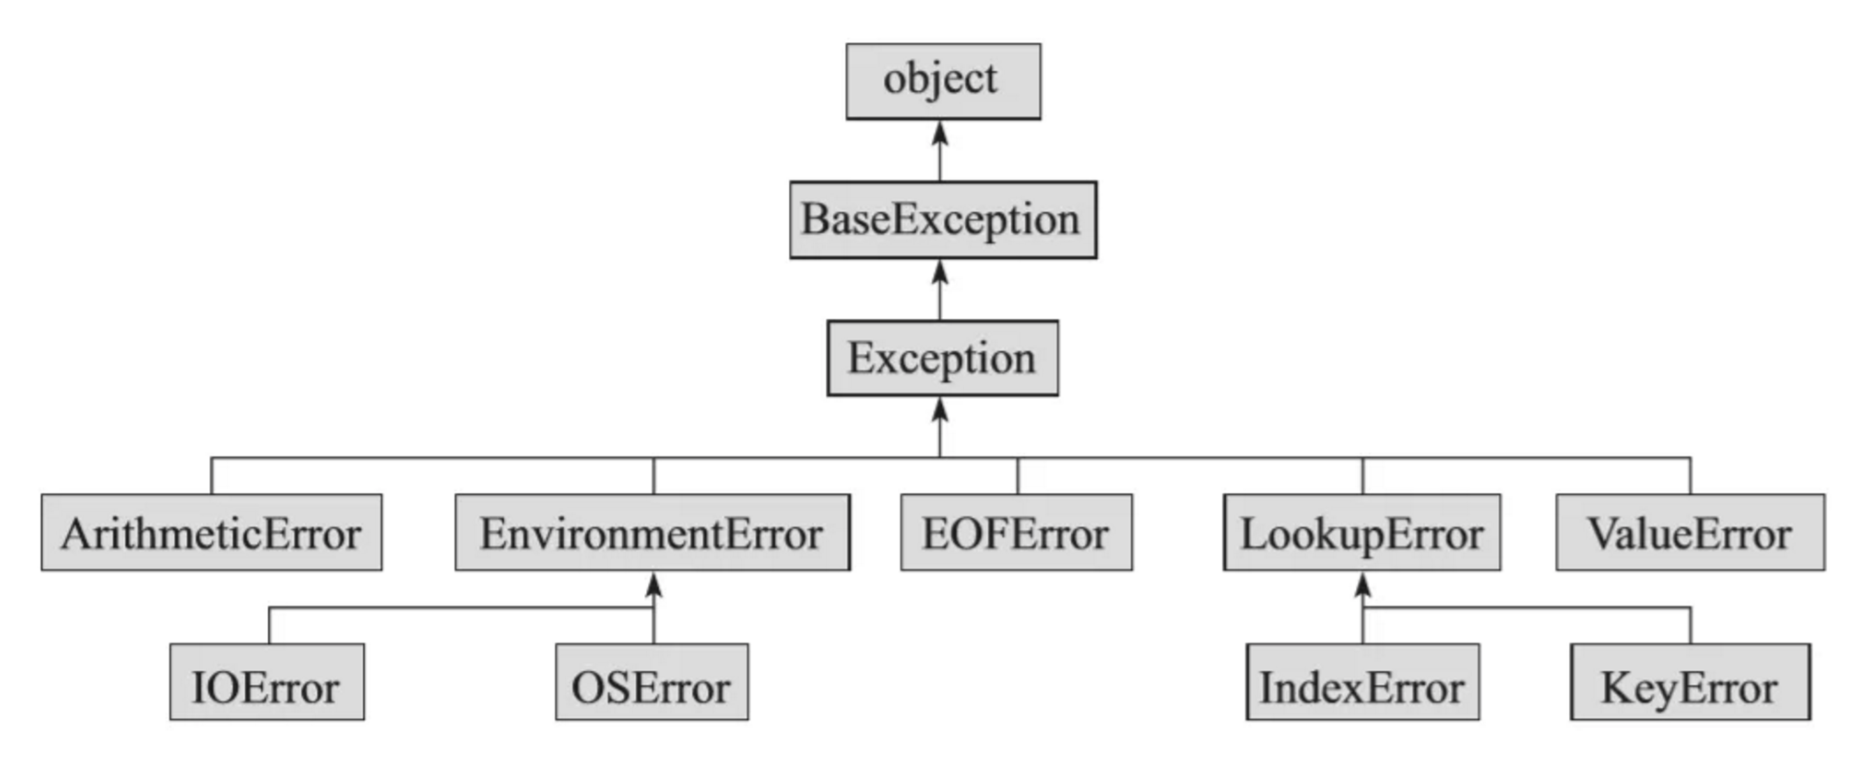

### Python 标准警告总结
除了标准异常的提示，警告的认识也是必要的，
 - Warning：警告的基类
 - DeprecationWarning：关于被弃用的特征的警告
 - FutureWarning：关于构造将来语义会有改变的警告
 - UserWarning：用户代码生成的警告
 - PendingDeprecationWarning：关于特性将会被废弃的警告
 - RuntimeWarning：可疑的运行时行为(runtime behavior)的警告
 - SyntaxWarning：可疑语法的警告
 - ImportWarning：用于在导入模块过程中触发的警告
 - UnicodeWarning：与Unicode相关的警告
 - BytesWarning：与字节或字节码相关的警告
 - ResourceWarning：与资源使用相关的警告

### Try
`try:
     检测语句
 except Exception[as reason]:
     出现异常后的处理代码`
 
 - 先执行try子句，即try和except之间的板块
 - 如果没有异常，忽略except语句，try子句执行后结束。
 - 如果try子句过程中发生异常，那么try子句余下的部分将被忽略；若异常的类型和except之后的名称相符，则对应的except子句将被执行，最后执行try语句之后的代码。
 - 如果一个异常没有与任何的except匹配，则异常会传递给上层的try中。
 - 执行except后，如果有finally语句块，则执行finally语句块（下文有说明）

#### try语句和一个except子句的执行案例

In [1]:
# eg.对于系统操作例如打开文件可能有误
try:
    t = open('test.txt')
    print(t.read())
    t.close()             #打开的文件关闭
except OSError:          #except BaseException:即所有类型的异常也试用
    print('打开文件出错')

In [2]:
# eg.对于可能出的错误明示
try:
    t = open('test.txt')
    print(t.read())
    t.close()
except BaseException as e:   #此处将问题简化为e，后面字符串明示
    print('打开文件出错\n原因：',str(e))

#### try语句包含多个except子句的执行案例，分别处理不同的特定的异常。
#### 注：即使从头到尾有n个异常，最多只有一个分支会被执行，正常情况是第一个分支被执行，按照顺序报第一个分支的异常，所以建议从最具针对性的异常到最通用的异常排序。

In [3]:
# eg.一个try+多个except案例
try:
    int("abc")
    s = 1 + 'a'
    f = open('test.txt')
    f.close
except OSError as OS:
    print('打开文件出错\n原因：',str(OS))
except TypeError as TE:
    print('类型出错\n原因：',str(TE))
except ValueError as VE:
    print('数值出错\n原因：',str(VE))

In [4]:
# eg.异常排查按照顺序排查，即使遇到错误异常和其子类
dict1 = {'a':1,'b':2,'v':3}
try:
    x = dict1 ['d']
except KeyError:
    print('键错误')
except LookupError:
    print('查询错误')
else:
    print('Others')
'''KeyError属于LookupError的子类,原案例是差错误在前，键错误在后排版，但还是根据try - except语句模式为主，程序优先执行except顺序在前代码'''

#### 能否同时处理多个异常呢？可以将异常放在一个括号里成为一个元组，但依旧按照try模块中的顺序来，只显示一个error

In [5]:
# eg.多个异常处理，也是按照顺序来，例如此案例是int排首位，如果s排首位则会显示TypeError
try:
    int("abc")
    s = 1 + '1'
    f = open('test.txt')
    print(f.read())
    f.close()
except (OSError, TypeError, ValueError) as error:
    print('出错了！\n原因：' ,str(error))

### try - except - finally 语句
`try:
     检测范围
 except Exception[as reason]:
     出现异常后的处理代码
 finally:
     无论如何都会被执行的代码`

 - 无论try子句里有没有发生异常，finally子句都会执行。
 - 如果一个异常在try子句里被抛出，又没有任何的except把它截住，则异常会在fianlly子句执行后被抛出。

In [6]:
# eg.定义一个除数函数，被除数和除数自定义，查看各种问题的执行结果
def divide(x, y):
    try:
        result = x / y
        print("result is ",result)
    except ZeroDivisionError:
        print("division by zero!")
    finally:
        print("The end.")

In [7]:
divide(3,1)

result is  3.0
The end.


In [8]:
divide(3,0)

division by zero!
The end.


In [9]:
divide("a",2)

The end.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### try - except - else 语句
`try:
    检测范围
except:
    出现异常后的处理代码
else:
    如果没有异常执行这块代码`
    
使用except不带异常类型时不能通过该程序识别出具体的异常信息，并不建议如此使用（如上）。可以如下使用：
`try:
    检测范围
except(Exception1,Exception2,...):
    发生以上多个执行中的一个，执行代码
else:
    如果没有异常执行此代码`

In [18]:
# eg.写入文件而不是输入/输出操作失败
try:
    f = open("test.text","w")
    f.write("测试文件测试异常！")
except IOError:
    print("Error:未找到对应文件或读取失败")
else:
    print("内容写入文件成功")
    f.close()

内容写入文件成功


### Raise语句 - 允许在程序中手动设置异常
 - 为什么要手动设置异常？首先分清楚程序发生异常和程序执行错误。后者是程序由于错误导致的运行异常，是需要程序员想办法解决的；前者是程序正常运行结果。
`try:
     raise NameError('Hi')
 except NameError:
     print('An exception flew by!')`

 - raise：单独一个 raise。该语句引发当前上下文中捕获的异常（比如在 except 块中），或默认引发 RuntimeError 异常。
 - raise 异常类名称：raise 后带一个异常类名称，表示引发执行类型的异常。
 - raise 异常类名称(描述信息)：在引发指定类型的异常的同时，附带异常的描述信息。
 - raise语句执行后会停止执行该模块下的剩余代码。
 - 使用raise语句抛出一个指定的异常，对于输入本质没有异常的可以定义一个指定异常。
     
` raise[Exception[,args[,traceback]]]`
 - Exception是异常的类型（例如NameError）,args是自己提供的异常参数，traceback参数是可选的，实践中很少使用，存在时是跟踪异常对象。


In [19]:
# eg.除了郭德纲，在岳云鹏心中都是类间的无效操作（不基于事实案例）
try:
    write = input("请输入相声演员的名称：")
    name = str(write)
    if name != "郭德纲":
        raise TypeError('岳云鹏大喊："捧哏的不行"')
    else:
        print('岳云鹏大喊：“师傅好棒棒哦！”')
except Exception as e:
    print("引发异常：",repr(e))

请输入相声演员的名称：于谦
引发异常： TypeError('岳云鹏大喊："捧哏的不行"')


**当输入不是郭德纲时，程序会进入if潘丹语句，并执行raise引发TypeError异常，但由于位于try模块，raise抛出的异常会被try捕获，并且由except快进行处理。**

In [20]:
try:
    a = input("输入一个数：")
    #判断用户输入的是否为数字
    if(not a.isdigit()):
        raise ValueError("a 必须是数字")
except ValueError as e:
    print("引发异常：",repr(e))

输入一个数：5


## 练习题 - 猜数字
1、猜数字游戏

题目描述:

电脑产生一个零到100之间的随机数字，然后让用户来猜，如果用户猜的数字比这个数字大，提示太大，否则提示太小，当用户正好猜中电脑会提示，"恭喜你猜到了这个数是......"。在用户每次猜测之前程序会输出用户是第几次猜测，如果用户输入的根本不是一个数字，程序会告诉用户"输入无效"。

(尝试使用try catch异常处理结构对输入情况进行处理)

获取随机数采用random模块。

#### 解题思路
 - 分为两个模块，第一个是对输入次数的规定，因为每次的输入次数都是由用户输入，所以需要input，并且由于是数字，需要先判断输入的内容。是数字则执行继续，否则显示“输入无效”。
 - 对于第一模块，可以应用try - except -else模式
 - 第二个是对随机数字的判定，首先定义一个随机正整数数字调用random模块中的randint函数，如果第一次猜测的数字正好等于这个，则显现“恭喜你才到了这个数是*”；大于随机数字提示太大，小于则提示太小，每猜测一次，次数减一，并且在猜测前显示次数。次数用完以前猜对了则显示同上，次数用完也没有猜对则跳出循环。如果输入的不是数字，则告诉用户“输入无效”，在猜测次数以内并有剩余次数可继续猜测。
 - 第二个模块，可以应用while循环和if判断，注意显现次数在输入以前，次数用完即为0.

In [17]:
from random import randint #调用模块
try:     #先判定猜测的次数是否输入有误，有误则提示并重新来
    countt = input("请输入你想猜测的次数：") 
    count = int(countt)
    num = randint(0,100)       #将要猜测的数字
    i = 1                      #目前猜测的次数
except ValueError as e:
    print("输入无效")
else:
    while i <= count :         #目前猜测的次数不超过预定次数都可以猜测
        print("这是第%d次猜测" % i)#显现猜测次数
        try:                   #对输入的数字进行判断，不是数字就显示输入无效，并且消耗一次
            numm = input("请输入你猜测的数字：")
            guess = int(numm)
        except ValueError as e:
            print("输入无效")
        else:                  #猜测的是数字请继续
            if guess == num:
                print("恭喜你猜到了这个数是%d"%num)
            elif guess > num:
                print("太大了")
            else:
                print("太小了")
        i +=1                  #每猜测一次消耗一次次数

请输入你想猜测的次数：2
这是第1次猜测
请输入你猜测的数字：4
太小了
这是第2次猜测
请输入你猜测的数字：k
输入无效


### 参考资料：
http://c.biancheng.net/view/2360.html

https://www.runoob.com/python/att-string-isdigit.html

https://www.cnblogs.com/ymd12103410/p/10877145.html

等……